Computational Physics 3 HW 2
Christopher Morris


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Problem 1

For N = 1.000000E+02 Mass: 0.8331799 and Mass Error: 0.2504983
For N = 1.000000E+02 Volume: 0.8000000 and Volume Error: 0.2400000

For N = 1.000000E+04 Mass: 0.9300940 and Mass Error: 0.0258647
For N = 1.000000E+04 Volume: 0.9184000 and Volume Error: 0.0255024

For N = 1.000000E+06 Mass: 0.8944802 and Mass Error: 0.0025416
For N = 1.000000E+06 Volume: 0.8840480 and Volume Error: 0.0025082



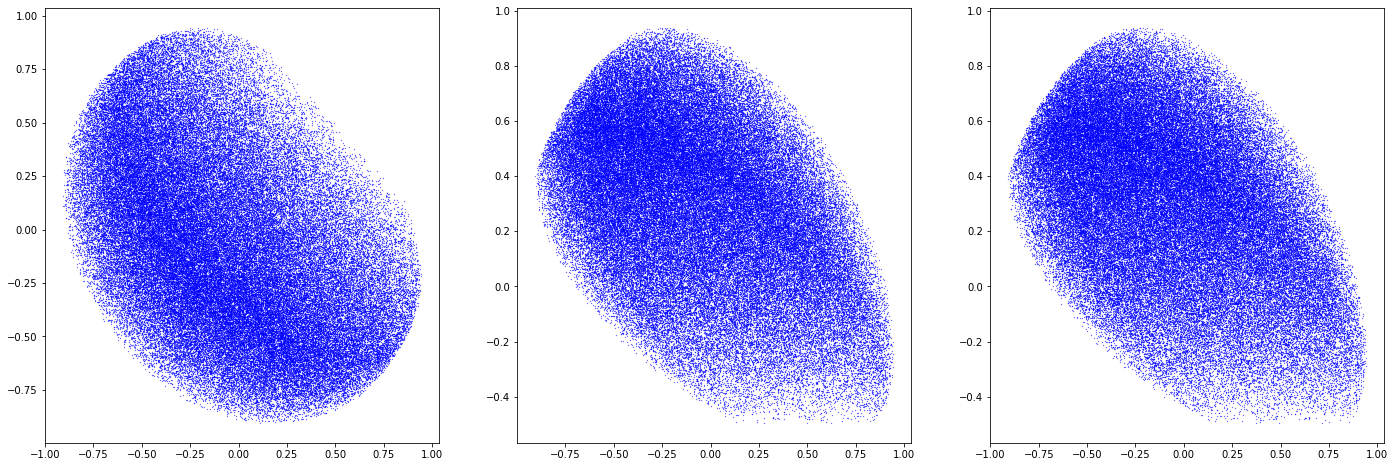

In [8]:
Nlist = [int(1e2), int(1e4), int(1e6)]
seed = 42
np.random.seed(seed)

def density(x,y,z):
    return np.exp(-x*y*z)

def volume_per_point(x,y,z):
    return x / x

for N in Nlist:
    m_accum = 0
    msq_accum = 0

    vol_accum = 0
    volsq_accum = 0
    
    Volume = 8 #The shape is defined inside a square from -1 to 1 (look at x = np.random.uniform(-1,1))

    x = np.random.uniform(-1,1,int(N))
    y = np.random.uniform(-1,1,int(N))
    z = np.random.uniform(-1,1,int(N))
    
    xgood = x[(x**2 + y**2 + z**2 < 1) & (x + y + z < .5) & (x + y + 2*z > 0)]
    ygood = y[(x**2 + y**2 + z**2 < 1) & (x + y + z < .5) & (x + y + 2*z > 0)]
    zgood = z[(x**2 + y**2 + z**2 < 1) & (x + y + z < .5) & (x + y + 2*z > 0)]

    m_accum     = density(xgood, ygood, zgood)
    msq_accum   = density(xgood, ygood, zgood)**2
    vol_accum   = volume_per_point(xgood, ygood, zgood)
    volsq_accum = volume_per_point(xgood, ygood, zgood)**2

    mavg     = np.sum(m_accum)/N
    msqavg   = np.sum(msq_accum)/N
    volavg   = np.sum(vol_accum)/N
    volsqavg = np.sum(volsq_accum)/N

    m       = mavg * Volume
    m_std   = np.sqrt((msqavg - mavg**2)/N) * Volume
    vol     = volavg * Volume
    vol_std = np.sqrt((volsqavg - volavg**2)/N) * Volume        

    print('For N = {:E} Mass: {:.7f} and Mass Error: {:.7f}'.format(N,m, m_std))
    print('For N = {:E} Volume: {:.7f} and Volume Error: {:.7f}\n'.format(N,vol, vol_std))

fig = plt.figure(figsize = (24,8))
# ax = plt.axes(projection='3d')
# ax.scatter3D(xgood, ygood, zgood);
plt.subplot(1,3,1)
plt.plot(xgood, ygood, 'b.', markersize=0.5)
plt.subplot(1,3,2)
plt.plot(ygood, zgood, 'b.', markersize=0.5)
plt.subplot(1,3,3)
plt.plot(xgood, zgood, 'b.', markersize=0.5)

plt.show()




Problem 2

# Solve by Hand to Check

Time Elasped 29.42126577700037
Trials: 916439 Tmin: 1.4122194516877569
Min x 0.52, and Min y 0.86


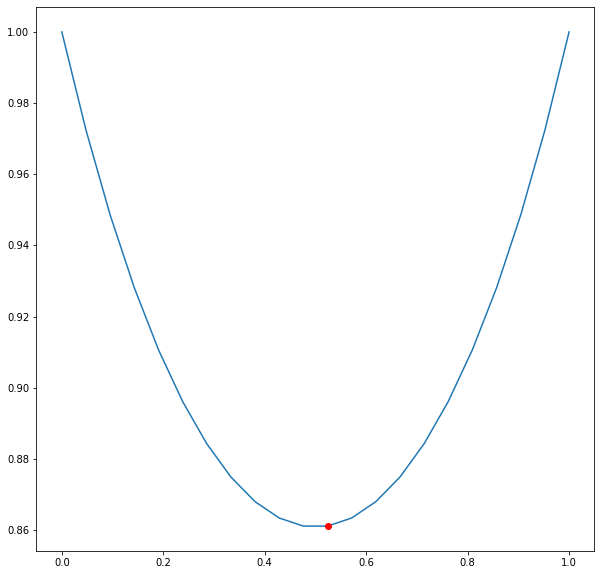

In [7]:
C = 1
seed = 42
np.random.seed(seed)
from timeit import default_timer as timer

def refr(x, y): # return the refractive index at (x, y)
    return 1 + .5*y**4
    

def transit(y):
    dy = y[1:] - y[:-1]
    xx = .5*(x[1:] + x[:-1])
    yy = .5*(y[1:] + y[:-1])
    return np.sum(refr(xx, yy) * np.sqrt(dx**2 + dy**2)) / C #Doesn't consider the last element

xa = 0
xb = 1
ya = 1
yb = 1

N = 21
x = np.linspace(xa, xb, N+1)
dx = x[1:] - x[:-1]
# y = np.linspace(xa, xb, N+1)
y = np.zeros((N+1))
y[0] = ya
y[N] = yb
y[1:N] = np.random.uniform(0, 1, N-1)

deltay = .001
noreduce = 0
tcurrent = transit(y)
trials = 0
maxsuccess = 5000
docheck = False

starttime = timer()
while True:
    trials += 1
    i = np.random.randint(1, N)
    y0 = y[i]
    y[i] += np.random.uniform(-deltay, deltay)
    t = transit(y)

    if t < tcurrent: 
        noreduce = 0
        tcurrent = t
    else:
        y[i] = y0 #Keep the original y
        noreduce += 1
                
    if noreduce >= maxsuccess:
        good = True
        
        if docheck:
            for j in range(1, N):
                y0 = y[j]
                delta = np.random.uniform(-deltay, deltay)

                y[j] = y0 + delta
                t = transit(y)

                if t < tcurrent:
                    print('Still can be reduced')
                    noreduce = 0
                    tcurrent = t
                    good = False
                    break

                y[j] = y0 - delta
                t = transit(y) 

                if t < tcurrent:
                    print('Still can be reduced')
                    noreduce = 0
                    tcurrent = t
                    good = False
                    break

                y[j] = y0
        if good:
            endtime = timer()
            break #After 1000 attempts to reduce t have failed
print('Time Elasped', endtime - starttime)  
print('Trials:', trials, 'Tmin:', tcurrent)   
plt.figure(figsize = (10,10))
plt.plot(x,y)

ymin = 100
xmin = 0
for i,xi in enumerate(x):
    if y[i] < ymin:
        xmin = x[i]
        ymin = y[i]

print('Min x {:.2f}, and Min y {:.2f}'.format(xmin, ymin))
plt.plot(xmin, ymin, 'ro', label = 'min')
plt.show()

Problem 4.3

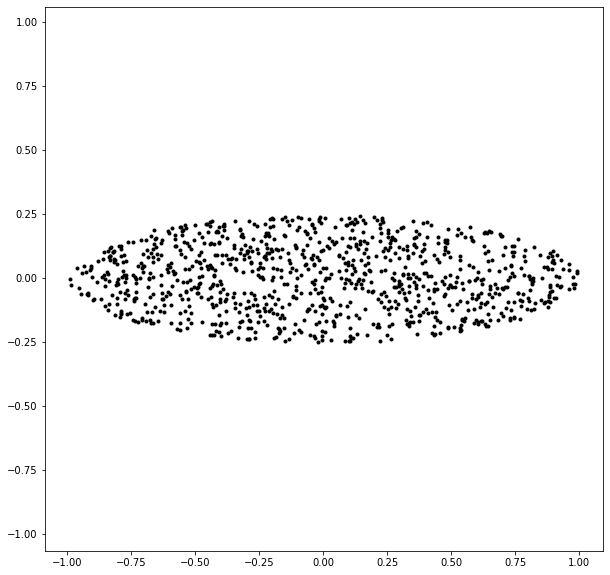

KeyboardInterrupt: 

In [11]:
#Calculate 2-D potential between source charge at xq, yq between the other charges
def getPotentialBetween(x, y, q, xq, yq): 
    #get's dr between the source charge and all other charges (includes source charge)
    dr = np.sqrt((x-xq)**2+(y-yq)**2)
    
    #Gets phi by taking dr and removing the dr = 0 (which is from source charge to source charge)
    phi = -K*q[dr>0]*np.log(dr[dr>0])

    return np.sum(phi)

#Calculates the 2-D Efield at the location of the source charge at xq, yq from the other charges
def getEfieldHatatCharge(x, y, q, xq, yq):
    #get's dr between the source charge and all other charges (includes source charge) and rx,ry components
    dr = np.sqrt((x-xq)**2+(y-yq)**2)
    rx = (x-xq)[dr>0]
    ry = (y-yq)[dr>0]
    
    #Gets E by taking dr and removing the dr = 0 (which is from source charge to source charge)
    #Since in 2-D; V = -kqln(r)  ==>  E = kq/|r| rhat ==>  E = kqr/|r|^2
    Ex = np.sum(K*q[dr>0] * rx/(dr[dr>0]**2))
    Ey = np.sum(K*q[dr>0] * ry/(dr[dr>0]**2))
    
    Emag = np.sqrt(Ex**2 + Ey**2)

    return Ex/Emag, Ey/Emag

#Physical Constants
K = 9.0e9

#Accept-Reject Uniform Points in Circle
R = 1
a = 1
b = .25
N = 1000
x = np.array([])
y = np.array([])

while True:
    n = N - x.size
    
    xbox = np.random.uniform(-R, R, n)
    ybox = np.random.uniform(-R, R, n)
    
    x = np.concatenate((x, xbox[((xbox/a)**2 + (ybox/b)**2) < 1]), axis = 0)
    y = np.concatenate((y, ybox[((xbox/a)**2 + (ybox/b)**2) < 1]), axis = 0)
    
    if n == 0:
        break
        
plt.figure(figsize = (10,10))
plt.axis('equal')
plt.plot(x, y, 'k.')
plt.show()

q = np.ones(x.size) * 1e-6
numcharges = q.size
#Done Initializing Charges

#Define Constants
deltarange = .1
numsuccess = 0
maxsuccess = 1000
runthrough = True

#Start Loop
while True:
    
    #Get charge (index number) and deltas for x and y
    charge = np.random.randint(0, numcharges) #Index for charge, not numcharge because random is exclusive
    delta  = np.random.uniform(0, deltarange)
    
    potold = getPotentialBetween(x, y, q, x[charge], y[charge]) 
    Ex, Ey = getEfieldHatatCharge(x, y, q, x[charge], y[charge])
    #Store original x,y values and then update
    x0 = x[charge]
    y0 = y[charge]
    x[charge] += -delta*Ex
    y[charge] += -delta*Ey
    
    #If charges are moved beyond a circle this places them back
    if ((x[charge]/a)**2 + (y[charge]/b)**2) > 1:
        rmag = np.sqrt((x[charge]/a)**2 + (y[charge]/b)**2)
        x[charge] = x[charge]/rmag  #If R != 1 then need to reconfigure this
        y[charge] = y[charge]/rmag

    potnew = getPotentialBetween(x, y, q, x[charge], y[charge])
    if potnew < potold: #The shift decreased the potential
        numsuccess = 0
    else:
        numsuccess += 1
        x[charge] = x0
        y[charge] = y0      
        
    #If failed to decrease the potential after 1000 success tries
    if numsuccess >= maxsuccess:
        break
        
plt.figure(figsize = (10,10))
plt.axis('equal')
plt.plot(x,y, 'k.')
plt.show()

In [8]:
xbad = x[(x/a)**2 + (y/b)**2 < .9]
ybad = y[(x/a)**2 + (y/b)**2 < .9]

badcharges = []
for i in range(numcharges):
    if (x[i]/a)**2 + (y[i]/b)**2 < .9:
        badcharges.append(i)

In [9]:
badcharge = badcharges[0]

In [10]:
badcharge = 34
potold = getPotentialBetween(x, y, q, x[badcharge], y[badcharge]) 
Ex, Ey = getEfieldHatatCharge(x, y, q, x[badcharge], y[badcharge])
#Store original x,y values and then update
x0 = x[badcharge]
y0 = y[badcharge]
x[badcharge] += delta*Ex
y[badcharge] += delta*Ey

breakpoint()
#If charges are moved beyond a circle this places them back
if ((x[badcharge]/a)**2 + (y[badcharge]/b)**2) > 1:
    rmag = np.sqrt((x[badcharge]/a)**2 + (y[badcharge]/b)**2)
    x[badcharge] = x[badcharge]/rmag  #If R != 1 then need to reconfigure this
    y[badcharge] = y[badcharge]/rmag

potnew = getPotentialBetween(x, y, q, x[badcharge], y[badcharge])
if potnew < potold: #The shift decreased the potential
    print('yes')
else:
    print('no')

--Return--
> <ipython-input-10-775a59178640>(10)<module>()->None
-> breakpoint()
(Pdb) Ex**2 + Ey**2
0.9999999999999997
(Pdb) Ex
0.45145160252209837
(Pdb) Ey
-0.8922956071729979
(Pdb) q


BdbQuit: 